In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
matplotlib.rcParams.update({ 'font.size': 14 })

import pyqg

import sys; sys.path.append('..')
from pyqg_subgrid_dataset import PYQGSubgridDataset
from models import *

In [2]:
def load_model(path):
    shape = (1, 32, 32)
    net = BasicCNN(shape, shape)
    net.load(path)
    return net

In [3]:
net = load_model('/scratch/zanna/data/pyqg/many_runs_few_steps_irregular/basic_cnn')
net

/ext3/miniconda3/envs/m2lines/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


BasicCNN(
  (conv): Sequential(
    (unflatten): Unflatten(dim=1, unflattened_size=(1, 32, 32))
    (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (relu1): ReLU()
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
    (relu2): ReLU()
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (flat): Flatten(start_dim=1, end_dim=-1)
  )
  (fc1): Linear(in_features=800, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=1024, bias=True)
)

In [8]:
predicted_means = []

def q_parameterization(pyqg_run):
    q = pyqg_run.q.reshape(-1,32*32)
    dq = net.predict(q.astype(np.float32)).reshape(pyqg_run.q.shape).astype(q.dtype)
    predicted_means.append(dq.mean())
    return dq

In [9]:
ds = PYQGSubgridDataset('/scratch/zanna/data/pyqg/many_runs_few_steps_irregular')

In [10]:
year = 24*60*60*360.
kwargs = dict(tmax=10*year, twrite=10000, tavestart=5*year, q_parameterization=q_parameterization)
m = pyqg.QGModel(**kwargs)

INFO:  Logger initialized


In [11]:
m.run()

/ext3/miniconda3/envs/m2lines/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains infinity or a value too large for dtype('float32').

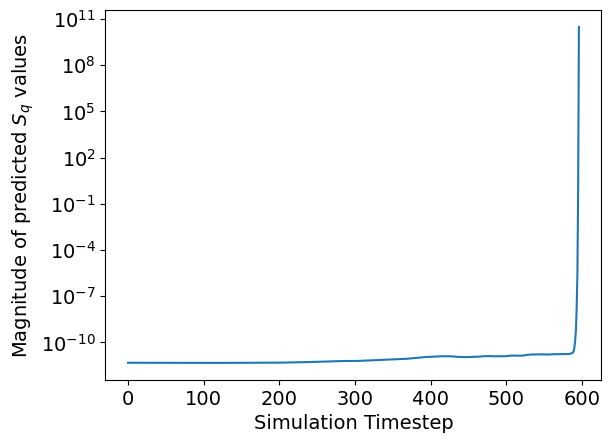

In [19]:
plt.plot(np.abs(predicted_means))
plt.yscale('log')
plt.xlabel("Simulation Timestep")
plt.ylabel("Magnitude of predicted $S_q$ values")
plt.show()